# FOURTH YEAR - SECOND SEMESTER 2020-2021 ACADEMIC YEAR
# MET 462 BIOMETEOROLOGY AND HUMAN HEALTH

In [1]:
from sympy import *
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Assigning variables for the SIR model
P = 30e6    # Total Population
mui = 2400       # Number of births per day
theta = 8/10000   # Death rate per day (7.7 per 10,000 people)
beta = 0.25       # Transmission rate from Susceptible to Infectious 25%
gamma = 0.03     # Recovery rate (rate of transition from Infectious to Recovered) 3%
alpha = 0.0025    # Mortality rate due to the disease 0.25%

In [2]:
# The SIR model differential equations.
def eqn(y, t, P, beta, gamma, alpha):
    S, I, R = y
    # Differential equation for Susceptible population
    dSdt = mui - (beta * S * I / P) - theta*S
    # Differential equation for Infected population
    dIdt = beta * S * I / P - theta*I - alpha*I - gamma * I 
    # Differential equation for Recovered population
    dRdt = gamma * I - theta*R
    return dSdt, dIdt, dRdt

In [10]:
# Initial conditions
I1, R1 = 1, 0  # Initial number of infected and recovered individuals
t = np.linspace(0, 365, 365)  # Time grid (in days)
S1 = P - I1 - R1  # Initial susceptible population
y1 = S1, I1, R1  # Initial conditions vector

# Solve the differential equations
sol = odeint(eqn, y1, t, args=(P, beta, gamma, alpha))

# Extract solutions for S, I, and R
S, I, R = sol.T/1e6

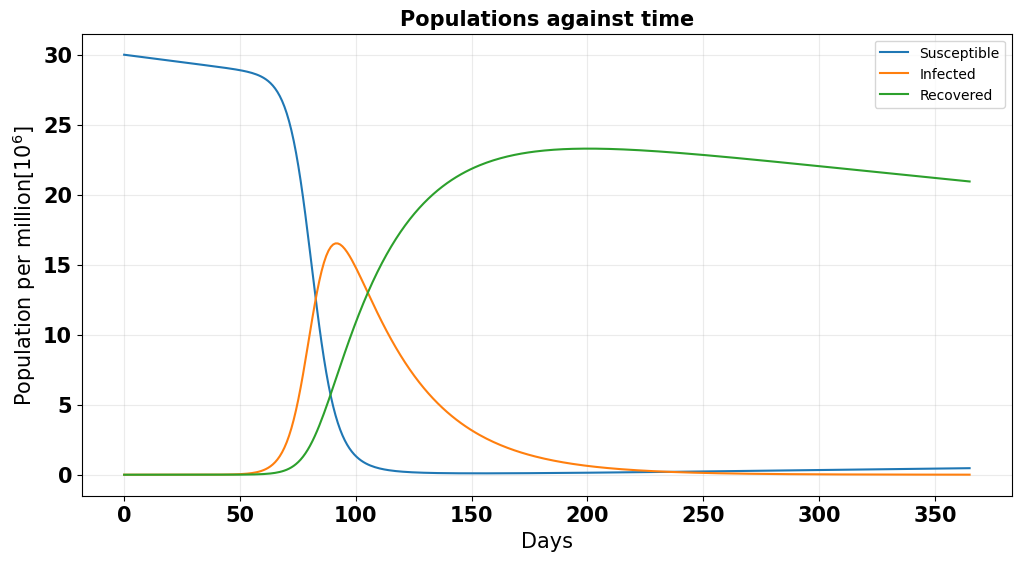

In [11]:
# Plotting the population curves
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.plot(t, S, label='Susceptible')
ax.plot(t, I, label='Infected')
ax.plot(t, R, label='Recovered')
ax.set_xlabel('Days',  fontsize=15)
ax.set_ylabel("Population per million[$10^6$]",  fontsize=15)
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.title('Populations against time', fontweight='bold', fontsize=15)
plt.legend()
plt.grid(alpha=0.25)

# Save the plot to a file
plt.savefig('Populations against time.JPEG')
plt.show()